## House Prices: Advanced Regression Techniques

Name:QIU Yaowen

Student ID:1730026087

## Problem Statement

It costs a lot to buy a house.People always wish to buy a better house with a lower price.However, the seller and the intermediary agent will be unhappy for this
#### So we wish to predict the price of the house with using some practical features,such as the location(street), house style, utilities, etc.

## Dataset

We have some dataset about the record of the house price compiled by Dean De Cock from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview. It describes the sale of individual residential property in Ames,Iowa from 2006 to 2010. It contains 2930 observations and large number of explanatory variables(23 nomonal,23 ordinal,14 discrete and 20 continus) involved in assessing home values. It is divided into two datasets which is the train data set and the test data set.

In summary, it contains:
    
    ·sample_submission.csv, A benchmark submission from a linear regression on year and month of sale, lot square footage, and nuMSSubClass: Identifies the type of dwelling involved in the sale. 1459rows x 2columns data
    
    ·test.csv,a dataset of 1459rows x 80columns data
    
    ·train.csv, a dataset of 1460rows x 81columns data
    
    ·data_description.txt,identify what the names of columns stand for

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import copy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import validation_curve
# to find the best alpha and score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from scipy import stats, special
from scipy.special import inv_boxcox

## General Info about our data

we can load the traning data and the test data into the project.

In [2]:
# the first column is ID, which can be use as index
train_data = pd.read_csv('train.csv', index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)

Have a look about what do those data look like

In [3]:
print(train_data.shape)
train_data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(test_data.shape)
test_data.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Here are the explanation of the columns

In [5]:
# description = open('data_description.txt','r') #there is a description file in the dataset
# for line in description:#read line by line
#     print(line);

It's quite long. Just comment it.

## Data cleaning and visualization

<font face="Times New Roman" color=red size=4><b>Null value</b></font>

First,we find the columns which contains null value

In [6]:
# columns in train_data contains null value
temp1 = train_data.isnull().any()
index1 = temp1.index.tolist()
columns1 = []
i = 0
for t in temp1:
    if(t == True):
        columns1.append(index1[i])
    i += 1
print("train data:")
print(columns1)

# columns in test_data contains null value
temp2 = test_data.isnull().any()
index2 = temp2.index.tolist()
columns2 = []
i = 0
for t in temp2:
    if(t == True):
        columns2.append(index2[i])
    i += 1
print("test data:")
print(columns2)

train data:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
test data:
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


It's not quite straight-forward. Visualize the amount of null value in above column in train data or test data,respectively

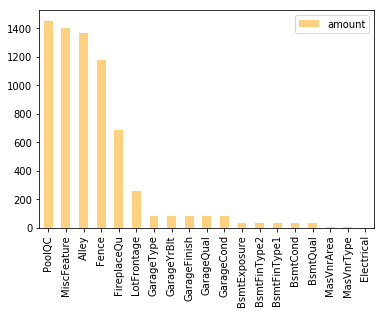

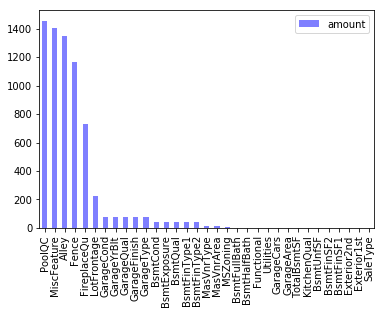

In [7]:
check_df1 = train_data[columns1]
num1 = check_df1.isna().sum()
null_value1 = pd.DataFrame({'amount': num1})
null_value1 = null_value1.sort_values(
    by='amount', ascending=False)  # sort them in an decresing order
null_value1.plot(kind='bar', alpha=0.5, rot=90, color='orange')

check_df2 = test_data[columns2]
num2 = check_df2.isna().sum()
null_value2 = pd.DataFrame({'amount': num2})
null_value2 = null_value2.sort_values(
    by='amount', ascending=False)  # sort them in an decresing order
null_value2.plot(kind='bar', alpha=0.5, rot=90, color='blue')

Some columns have terrible amount of null value, we must drop this columns

In [8]:
train_data = train_data.drop(
    ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
test_data = test_data.drop(
    ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

I notice that there are some variables called "Garage**", and we have variable "GarageCars", there is strong relationship among them. so we can drop those columns

In [9]:
train_data.drop(['GarageYrBlt', 'GarageFinish', 'GarageCond',
                 'GarageQual', 'GarageType'], axis=1, inplace=True)
test_data.drop(['GarageYrBlt', 'GarageFinish', 'GarageCond',
                'GarageQual', 'GarageType'], axis=1, inplace=True)

Same as "bsmtxx" and "MasVnrxx"

In [10]:
train_data.drop(['BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                 'BsmtFinType1', 'MasVnrType'], axis=1, inplace=True)
test_data.drop(['BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                'BsmtFinType1', 'MasVnrType'], axis=1, inplace=True)

In [11]:
for i in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageFinish', 'GarageCond', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']:
    columns1.remove(i)  # remove the column which we have already remove
    columns2.remove(i)
# To find the left column with null value
train_data[columns1].head()

,MasVnrArea,BsmtQual,Electrical
Id,,,
1,196.0,Gd,SBrkr
2,0.0,Gd,SBrkr
3,162.0,Gd,SBrkr
4,0.0,TA,SBrkr
5,350.0,Gd,SBrkr


I decide to fill the discrete null value with the most frequent value in its column and fill the continuous null value with the mean value of its column

In [12]:
# since the distribution of each variable are given in Kaggle, i just look up them
train_data['Electrical'].fillna('SBrkr', inplace=True)
train_data['BsmtQual'].fillna('Gd', inplace=True)
# fill with the mean value or zero
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)

In [13]:
test_data[columns2].head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
Id,,,,,,,,,,,,,,,,,
1461,RH,AllPub,VinylSd,VinylSd,0.0,TA,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1462,RL,AllPub,Wd Sdng,Wd Sdng,108.0,TA,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
1463,RL,AllPub,VinylSd,VinylSd,0.0,Gd,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
1464,RL,AllPub,VinylSd,VinylSd,20.0,TA,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
1465,RL,AllPub,HdBoard,HdBoard,0.0,Gd,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [14]:
# since the distribution of each variable are given in Kaggle, i just look up them
test_data['MSZoning'] = test_data['MSZoning'].fillna('RL')
test_data['Utilities'] = test_data['Utilities'].fillna('AllPub')
test_data['Exterior1st'] = test_data['Exterior1st'].fillna('VinylSd')
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna('VinylSd')
test_data['KitchenQual'] = test_data['KitchenQual'].fillna('TA')
test_data['Functional'] = test_data['Functional'].fillna('Typ')
test_data['SaleType'] = test_data['SaleType'].fillna('WD')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('Gd')
# fill with the mean value or zero
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(
    test_data['MasVnrArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(
    test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(
    test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(
    test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(
    test_data['TotalBsmtSF'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(
    test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(
    test_data['GarageArea'].mean())
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(
    test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(
    test_data['BsmtHalfBath'].mean())

Now,we can see our data again to check whether there is any null value left

In [15]:
# if both the dataset have no null value, nothing should be printed out
for i in train_data.isnull().any():
    if(i == True):
        print(i)
for i in test_data.isnull().any():
    if(i == True):
        print(i)

<font face="Times New Roman" color=red size=4><b>Reduce multillinearity<b></font>

From the course <b>Regression Analysis</b>,we learn that we should remove variables which have high correlation with another beacause it will cause multillinearity

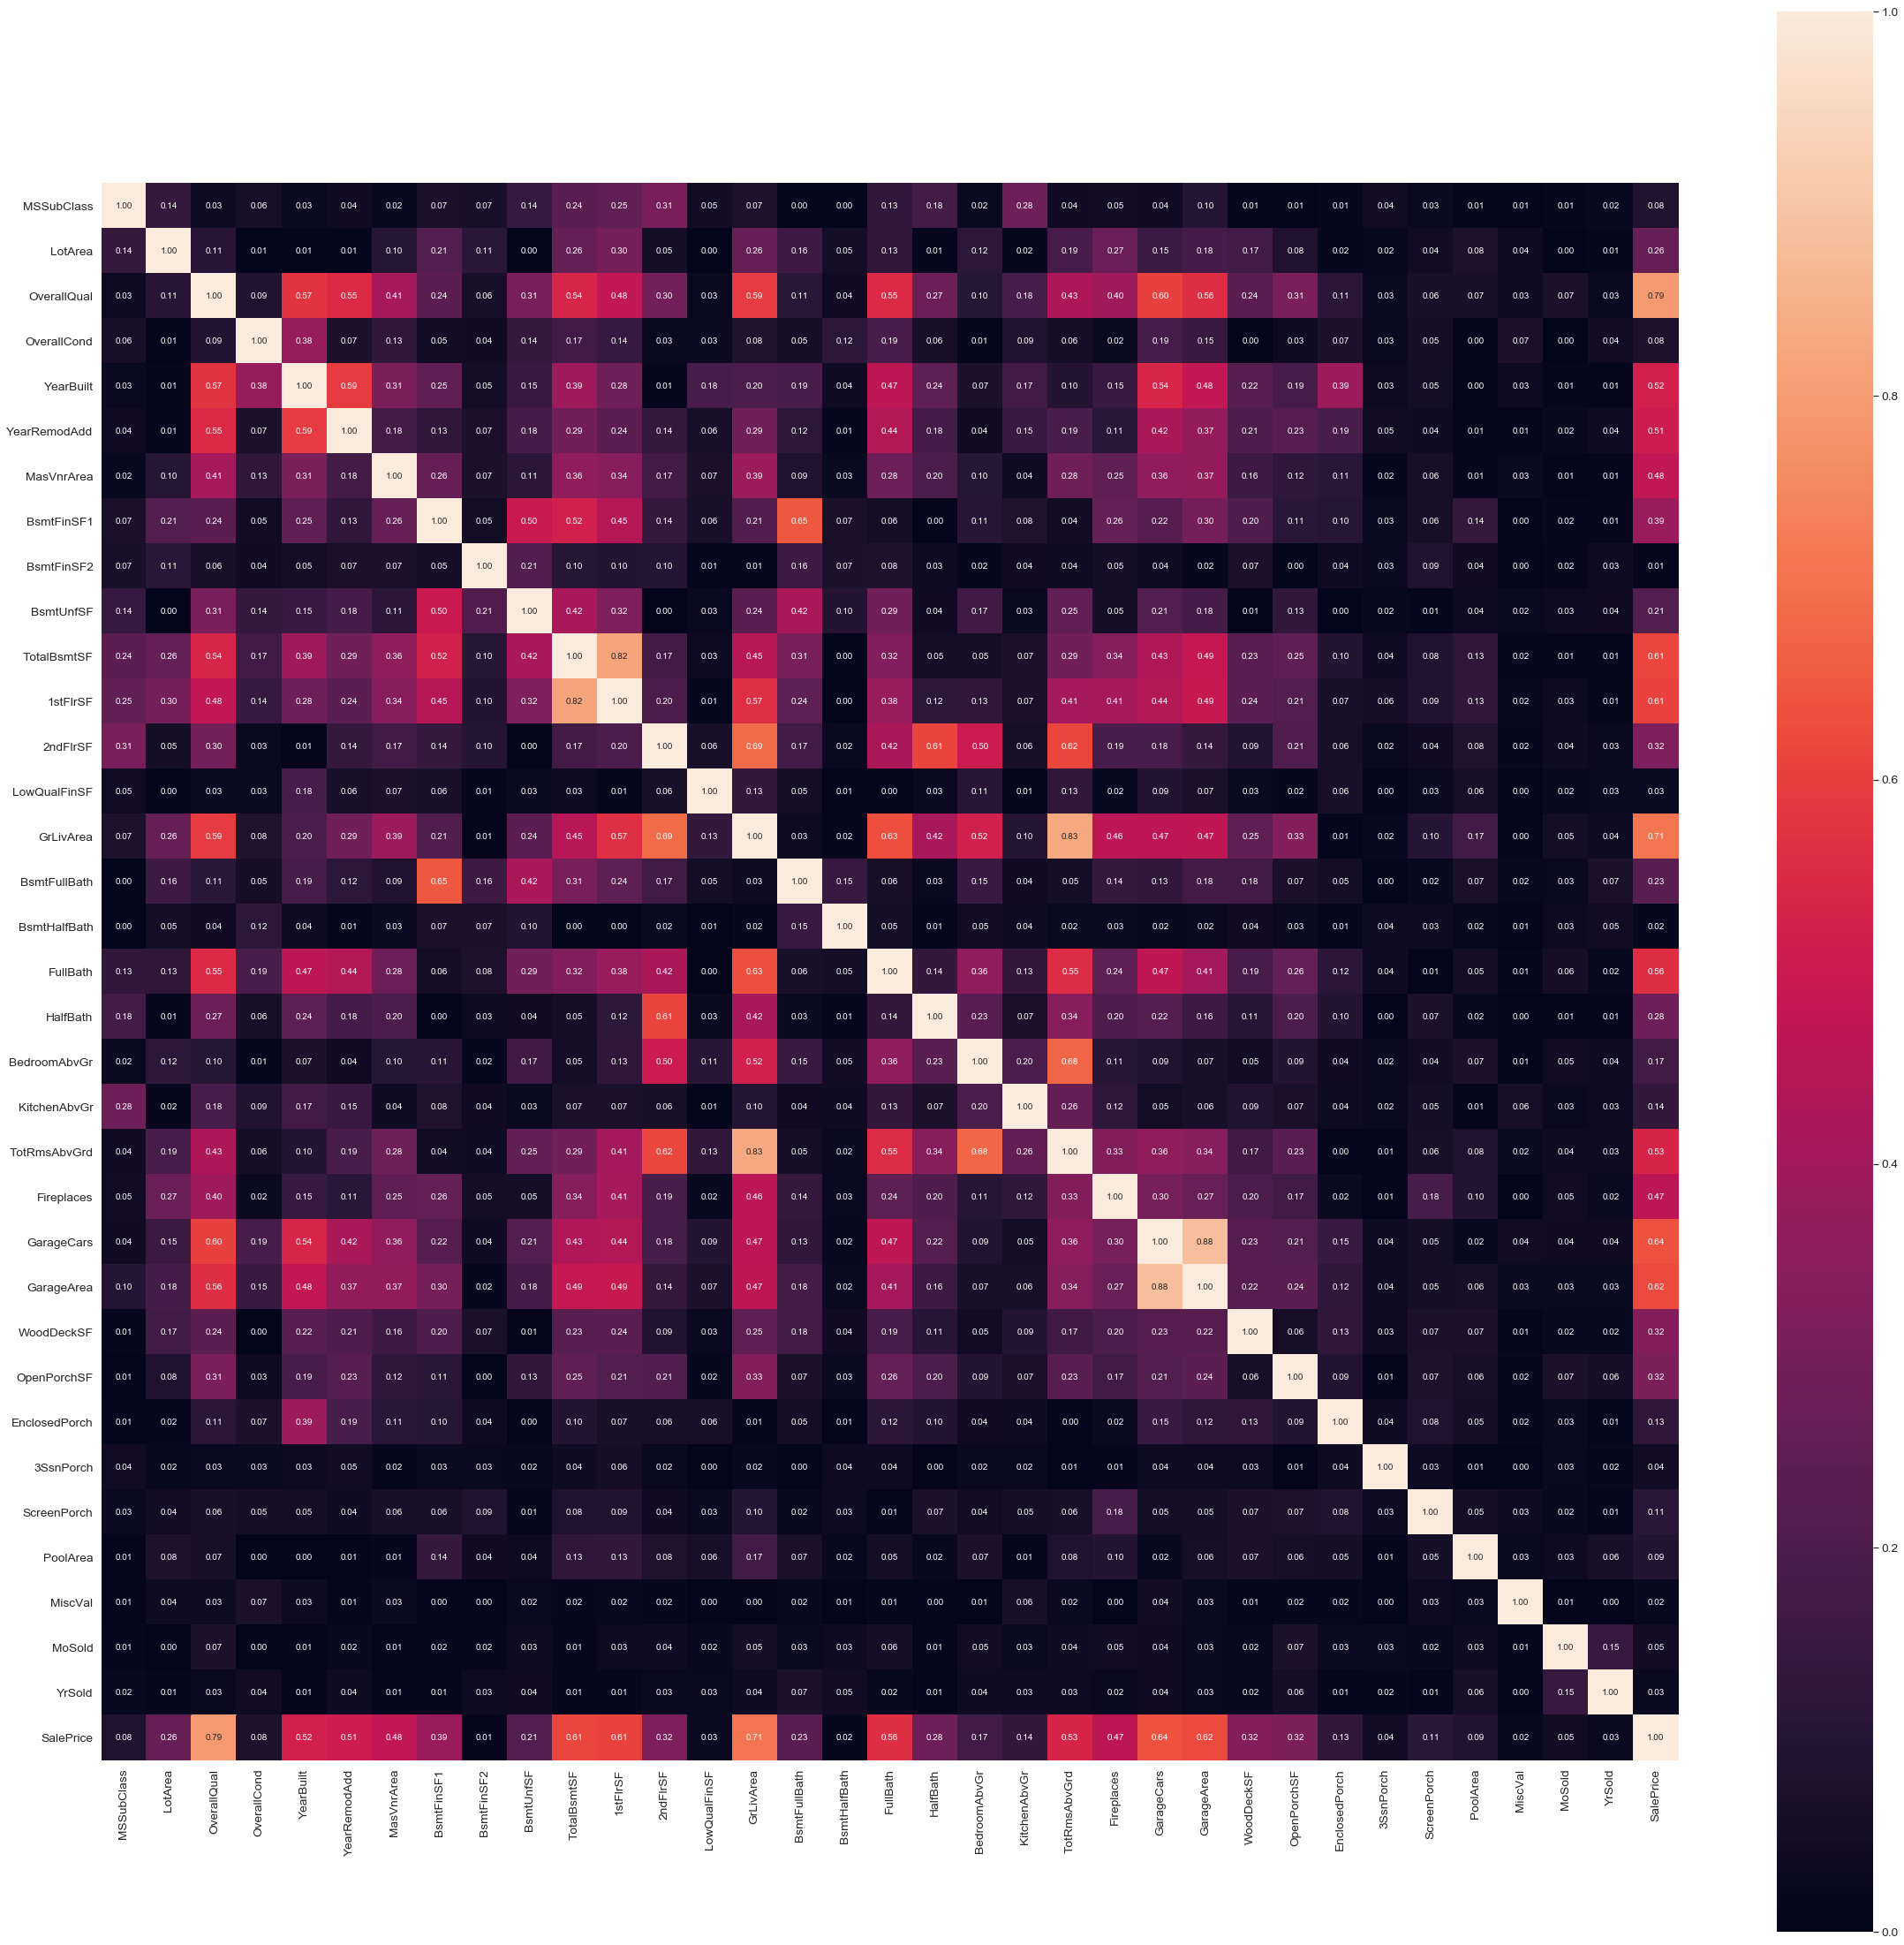

In [16]:
# function to get the correlation between each variable
corr = abs(train_data.corr())
plt.figure(figsize=[40, 40])
cols_first = corr['SalePrice'].index  # get the index of all corr matrix
# use abosolute value to show the strength of correlation
column = abs(np.corrcoef(train_data[cols_first].values.T))
sns.set(font_scale=1.25)
sns.heatmap(column, cbar=True, annot=True, square=True, vmin=0, vmax=1, fmt='.2f', annot_kws={
            'size': 10}, yticklabels=cols_first.values, xticklabels=cols_first.values)
plt.show()

In [17]:
# drop = ['GarageCars','1stFlrSF','TotRmsAbvGrd','ExterQual_Gd','SaleCondition_Partial','KitchenQual_Gd','Foundation_CBlock','2ndFlrSF','HeatingQC_TA','CentralAir_N','Exterior1st_VinylSd','RoofStyle_Gable','LotShape_IR1','LotShape_Reg','MSZoning_RL','PavedDrive_N','SaleType_WD','BsmtUnfSF','Exterior2nd_VinylSd']
drop = ['GarageCars', '1stFlrSF', 'TotRmsAbvGrd', '2ndFlrSF', 'BsmtFullBath']
train_data = train_data.drop(drop, axis=1)
test_data = test_data.drop(drop, axis=1)
cols_first = list(cols_first)
for d in drop:
    cols_first.remove(d)

<font face="Times New Roman" color=red size=4><b>Eliminate the outliers<b></font>

It's difficult to check all the outliers by looking the relational graph of each variables and sale price.

Therefore, we can delete the outliers by looking the graph of top 30 variables which influence sale price much more

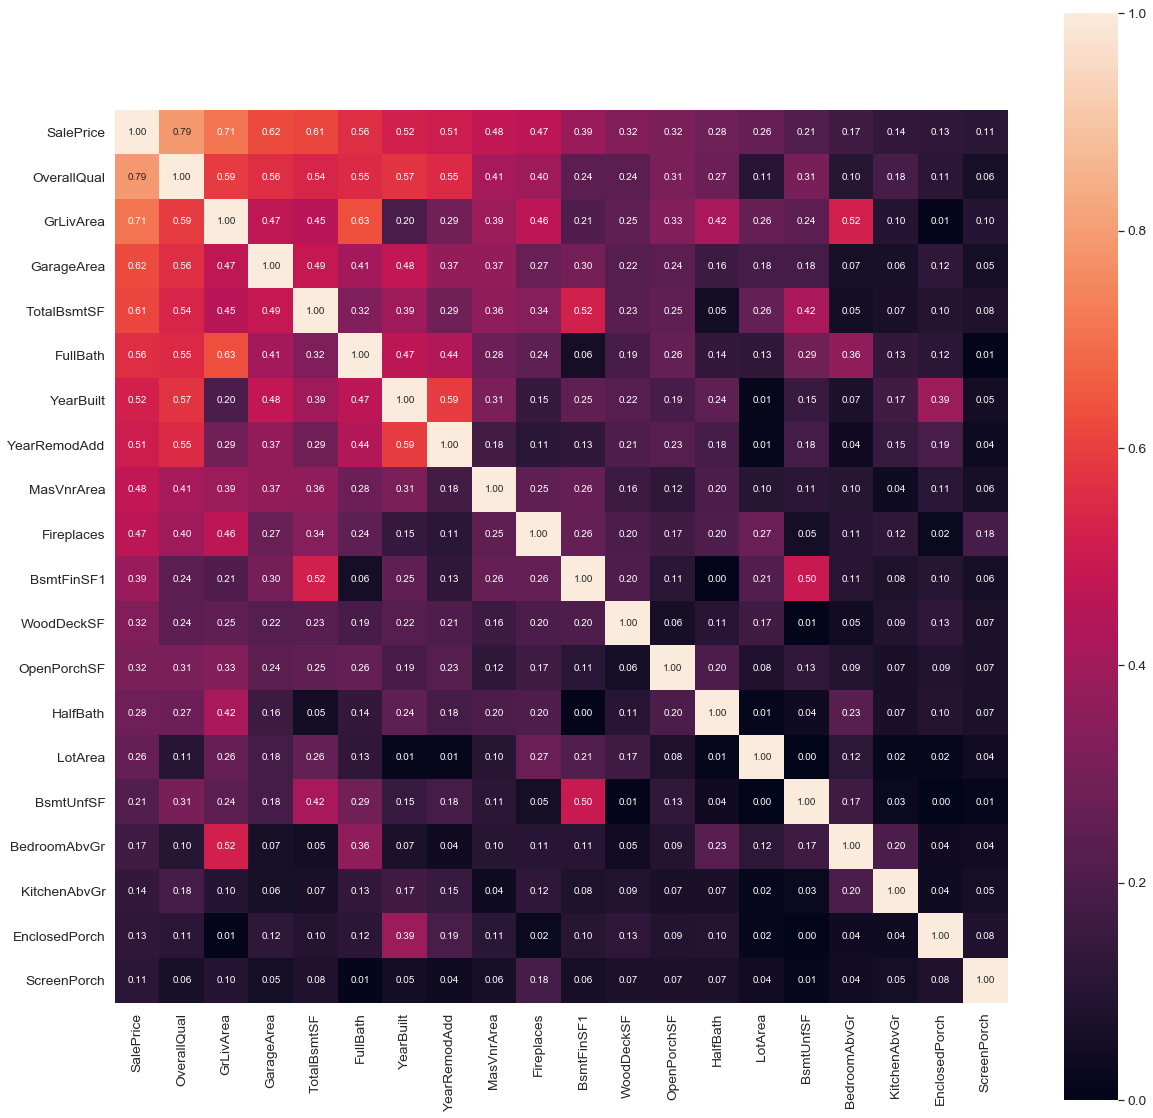

In [18]:
# function to get the correlation between each variable
corr = abs(train_data.corr())
plt.figure(figsize=[20, 20])
n = 20
cols_second = corr.nlargest(n, 'SalePrice')['SalePrice'].index
column = abs(np.corrcoef(train_data[cols_second].values.T))
sns.set(font_scale=1.25)
sns.heatmap(column, cbar=True, annot=True, square=True, vmin=0, vmax=1, fmt='.2f', annot_kws={
            'size': 10}, yticklabels=cols_second.values, xticklabels=cols_second.values)
plt.show()

visualize them in the scatter plot

In [19]:
# a function to generate random color
def randomcolor():
    colorList = ['1', '2', '3', '4', '5', '6', '7',
                 '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    color = ""
    for i in range(6):
        color += colorList[random.randint(0, 14)]
    return "#"+color

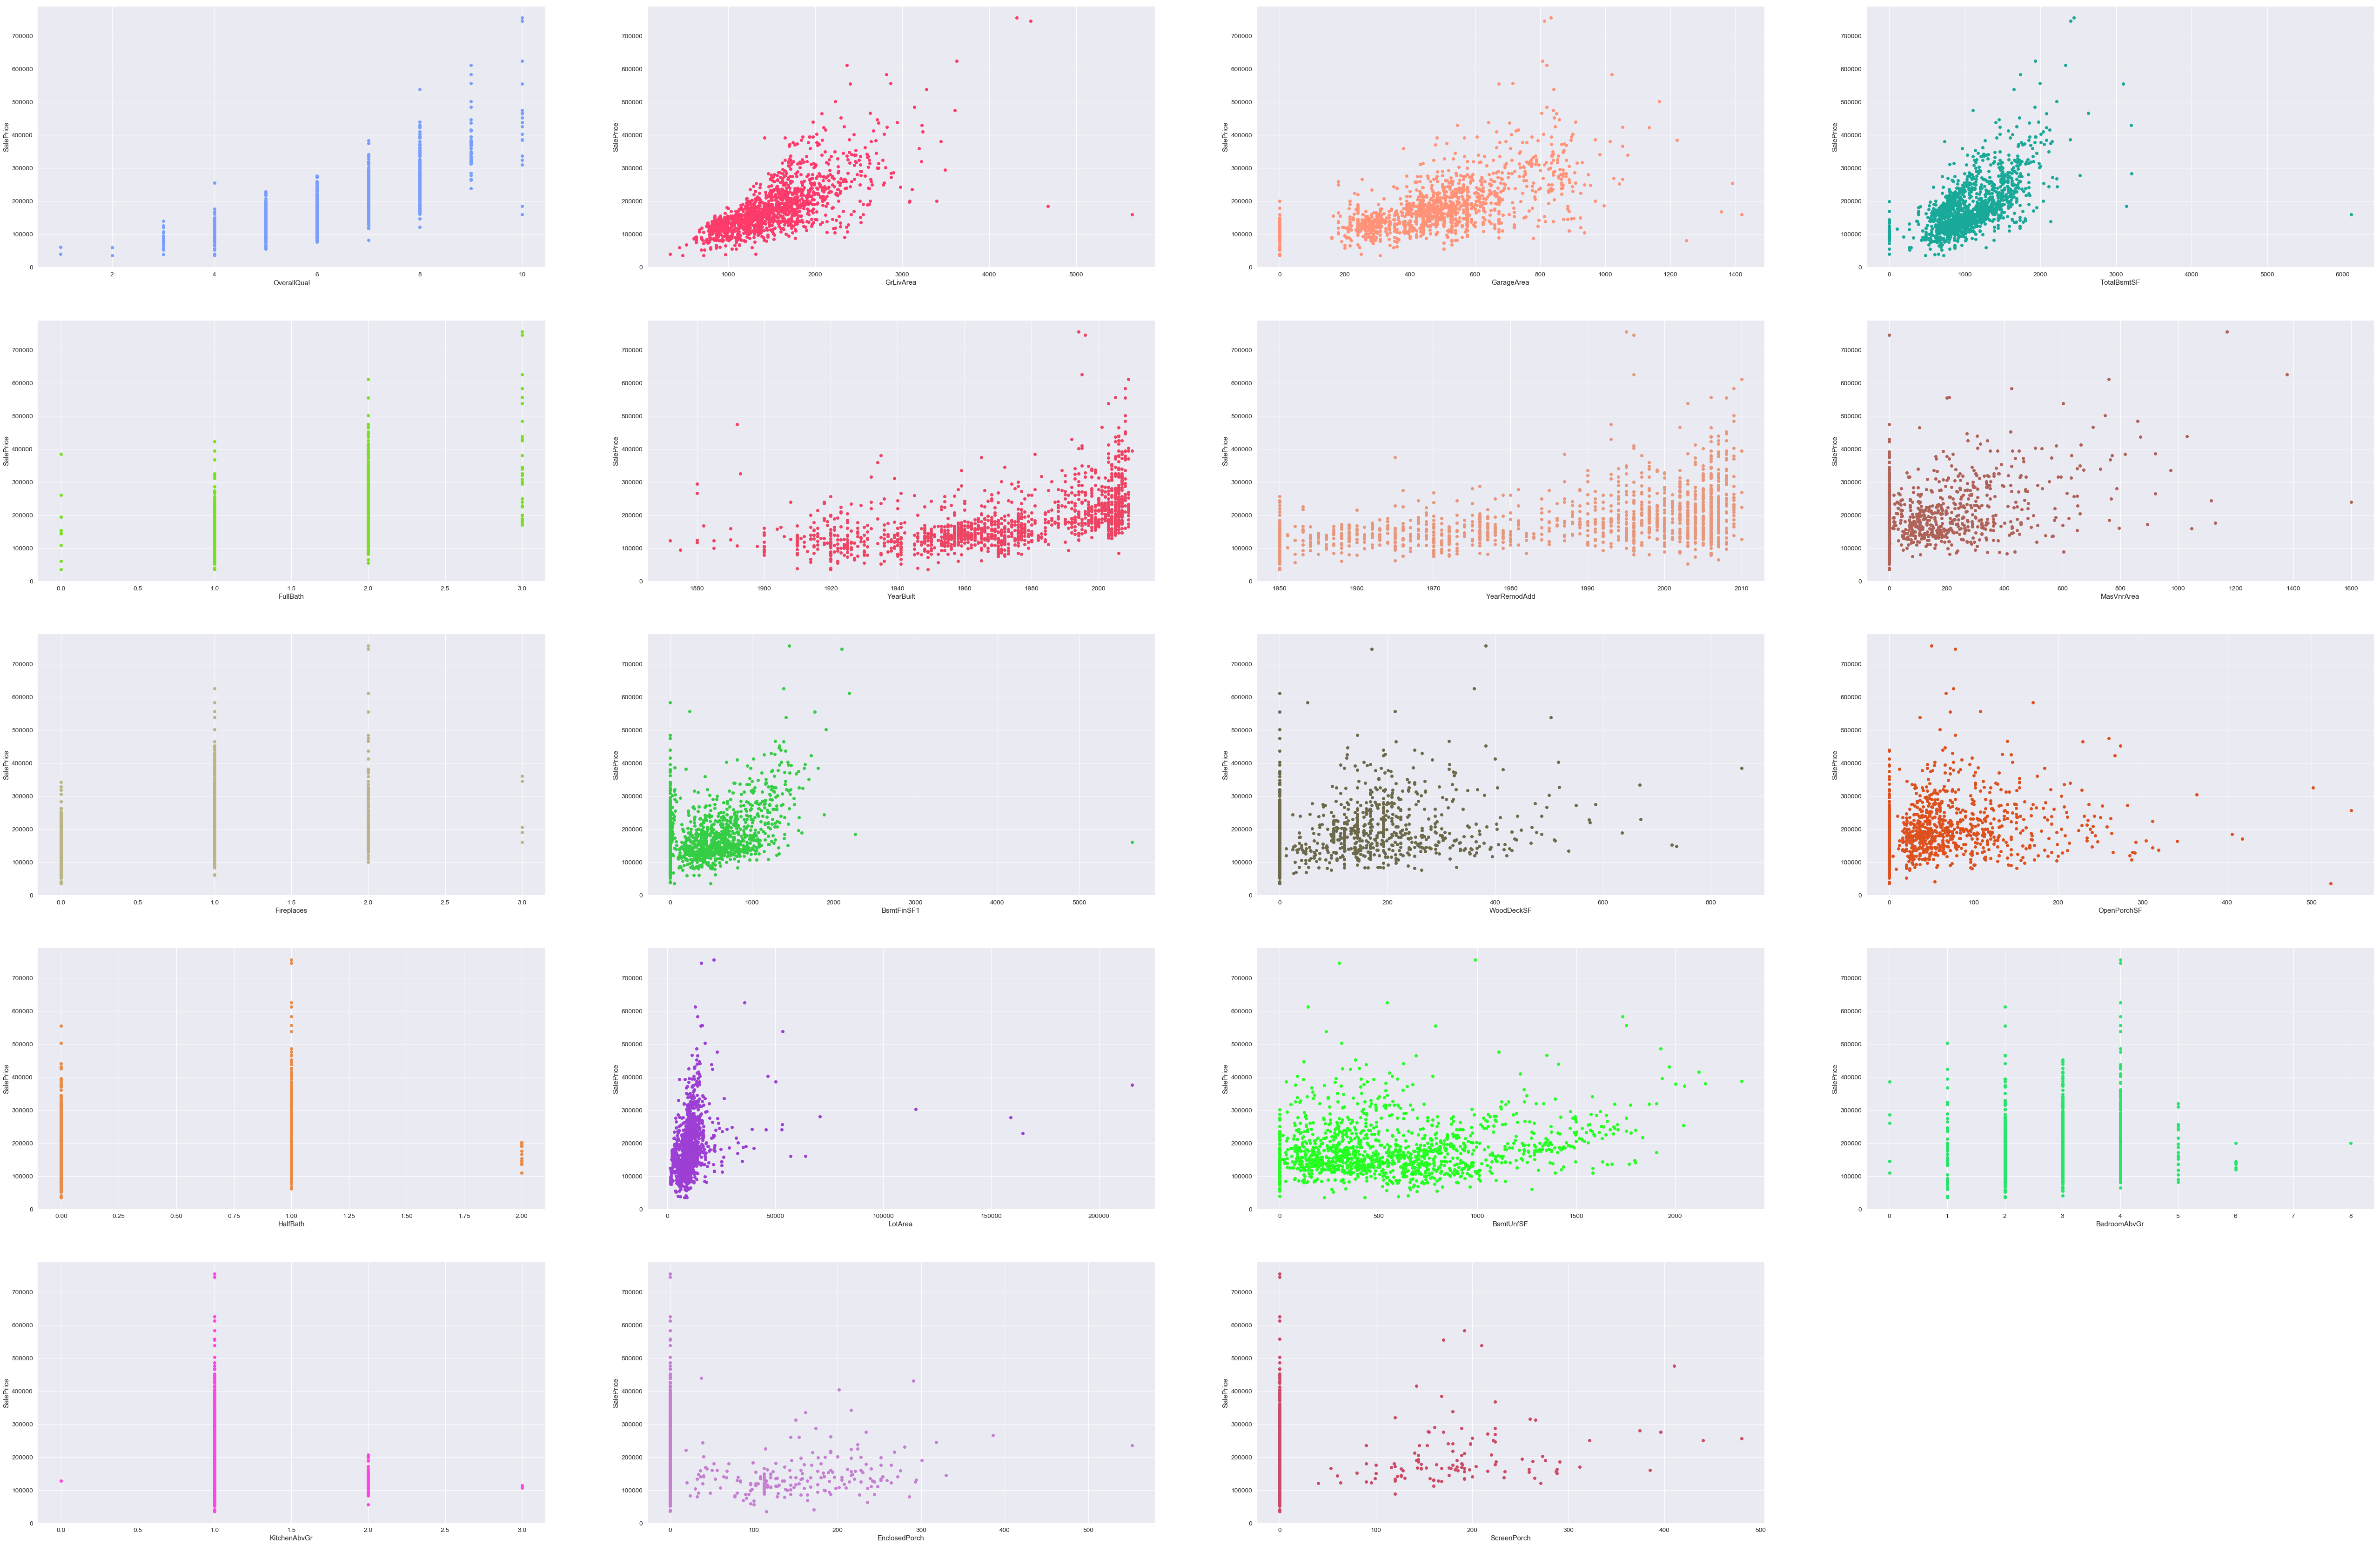

In [20]:
fig = plt.figure(figsize=[90, 60])
cols_l = list(cols_second)
cols_l.remove('SalePrice')
y = train_data['SalePrice']
index = 1
for i in cols_l:
    plt.subplot(5, 4, index)
    # use scatter plot to plot it
    plt.scatter(train_data[i], y, color=randomcolor())
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    index += 1

From the graph above, we could find some data are outliers.Since we have reduce the multicolinearity, strong correlation with each variable does not exist.Fill these value with the mean value

In [21]:
train_data.drop(train_data[(train_data['GarageArea'] > 1200) & (
    train_data["SalePrice"] < 300000)].index, inplace=True)
train_data.drop(train_data[(train_data["GrLivArea"] > 4000) & (
    train_data["SalePrice"] < 200000)].index, inplace=True)
train_data.drop(train_data[train_data["TotalBsmtSF"]
                           > 5800].index, inplace=True)
train_data.drop(
    train_data[(train_data["MasVnrArea"] > 1400)].index, inplace=True)
train_data.drop(train_data[(train_data["BsmtFinSF1"] > 2000) & (
    train_data["SalePrice"] < 200000)].index, inplace=True)
train_data.drop(
    train_data[(train_data["LotArea"] > 70000)].index, inplace=True)
train_data.drop(train_data[(train_data["BsmtUnfSF"] < 1000) & (
    train_data["SalePrice"] > 600000)].index, inplace=True)
train_data.drop(train_data[(train_data["YearBuilt"] < 1900) & (
    train_data["SalePrice"] > 300000)].index, inplace=True)
train_data.drop(train_data[(train_data["OpenPorchSF"] > 500) & (
    train_data["SalePrice"] < 100000)].index, inplace=True)

<font face="Times New Roman" color=red size=4><b>Select some categorical variables</b></font>

The correlation matrix only listed variables which are continuous or discrete and many categorical varibales are not mentioned.

However,due to my limitation of knowledge, I can not analyze all of them. Therefore, I use box plot to plot all the categorical variables and choose those variables which <b>have obivious correlation with sale price</b> and <b>less outliers</b>

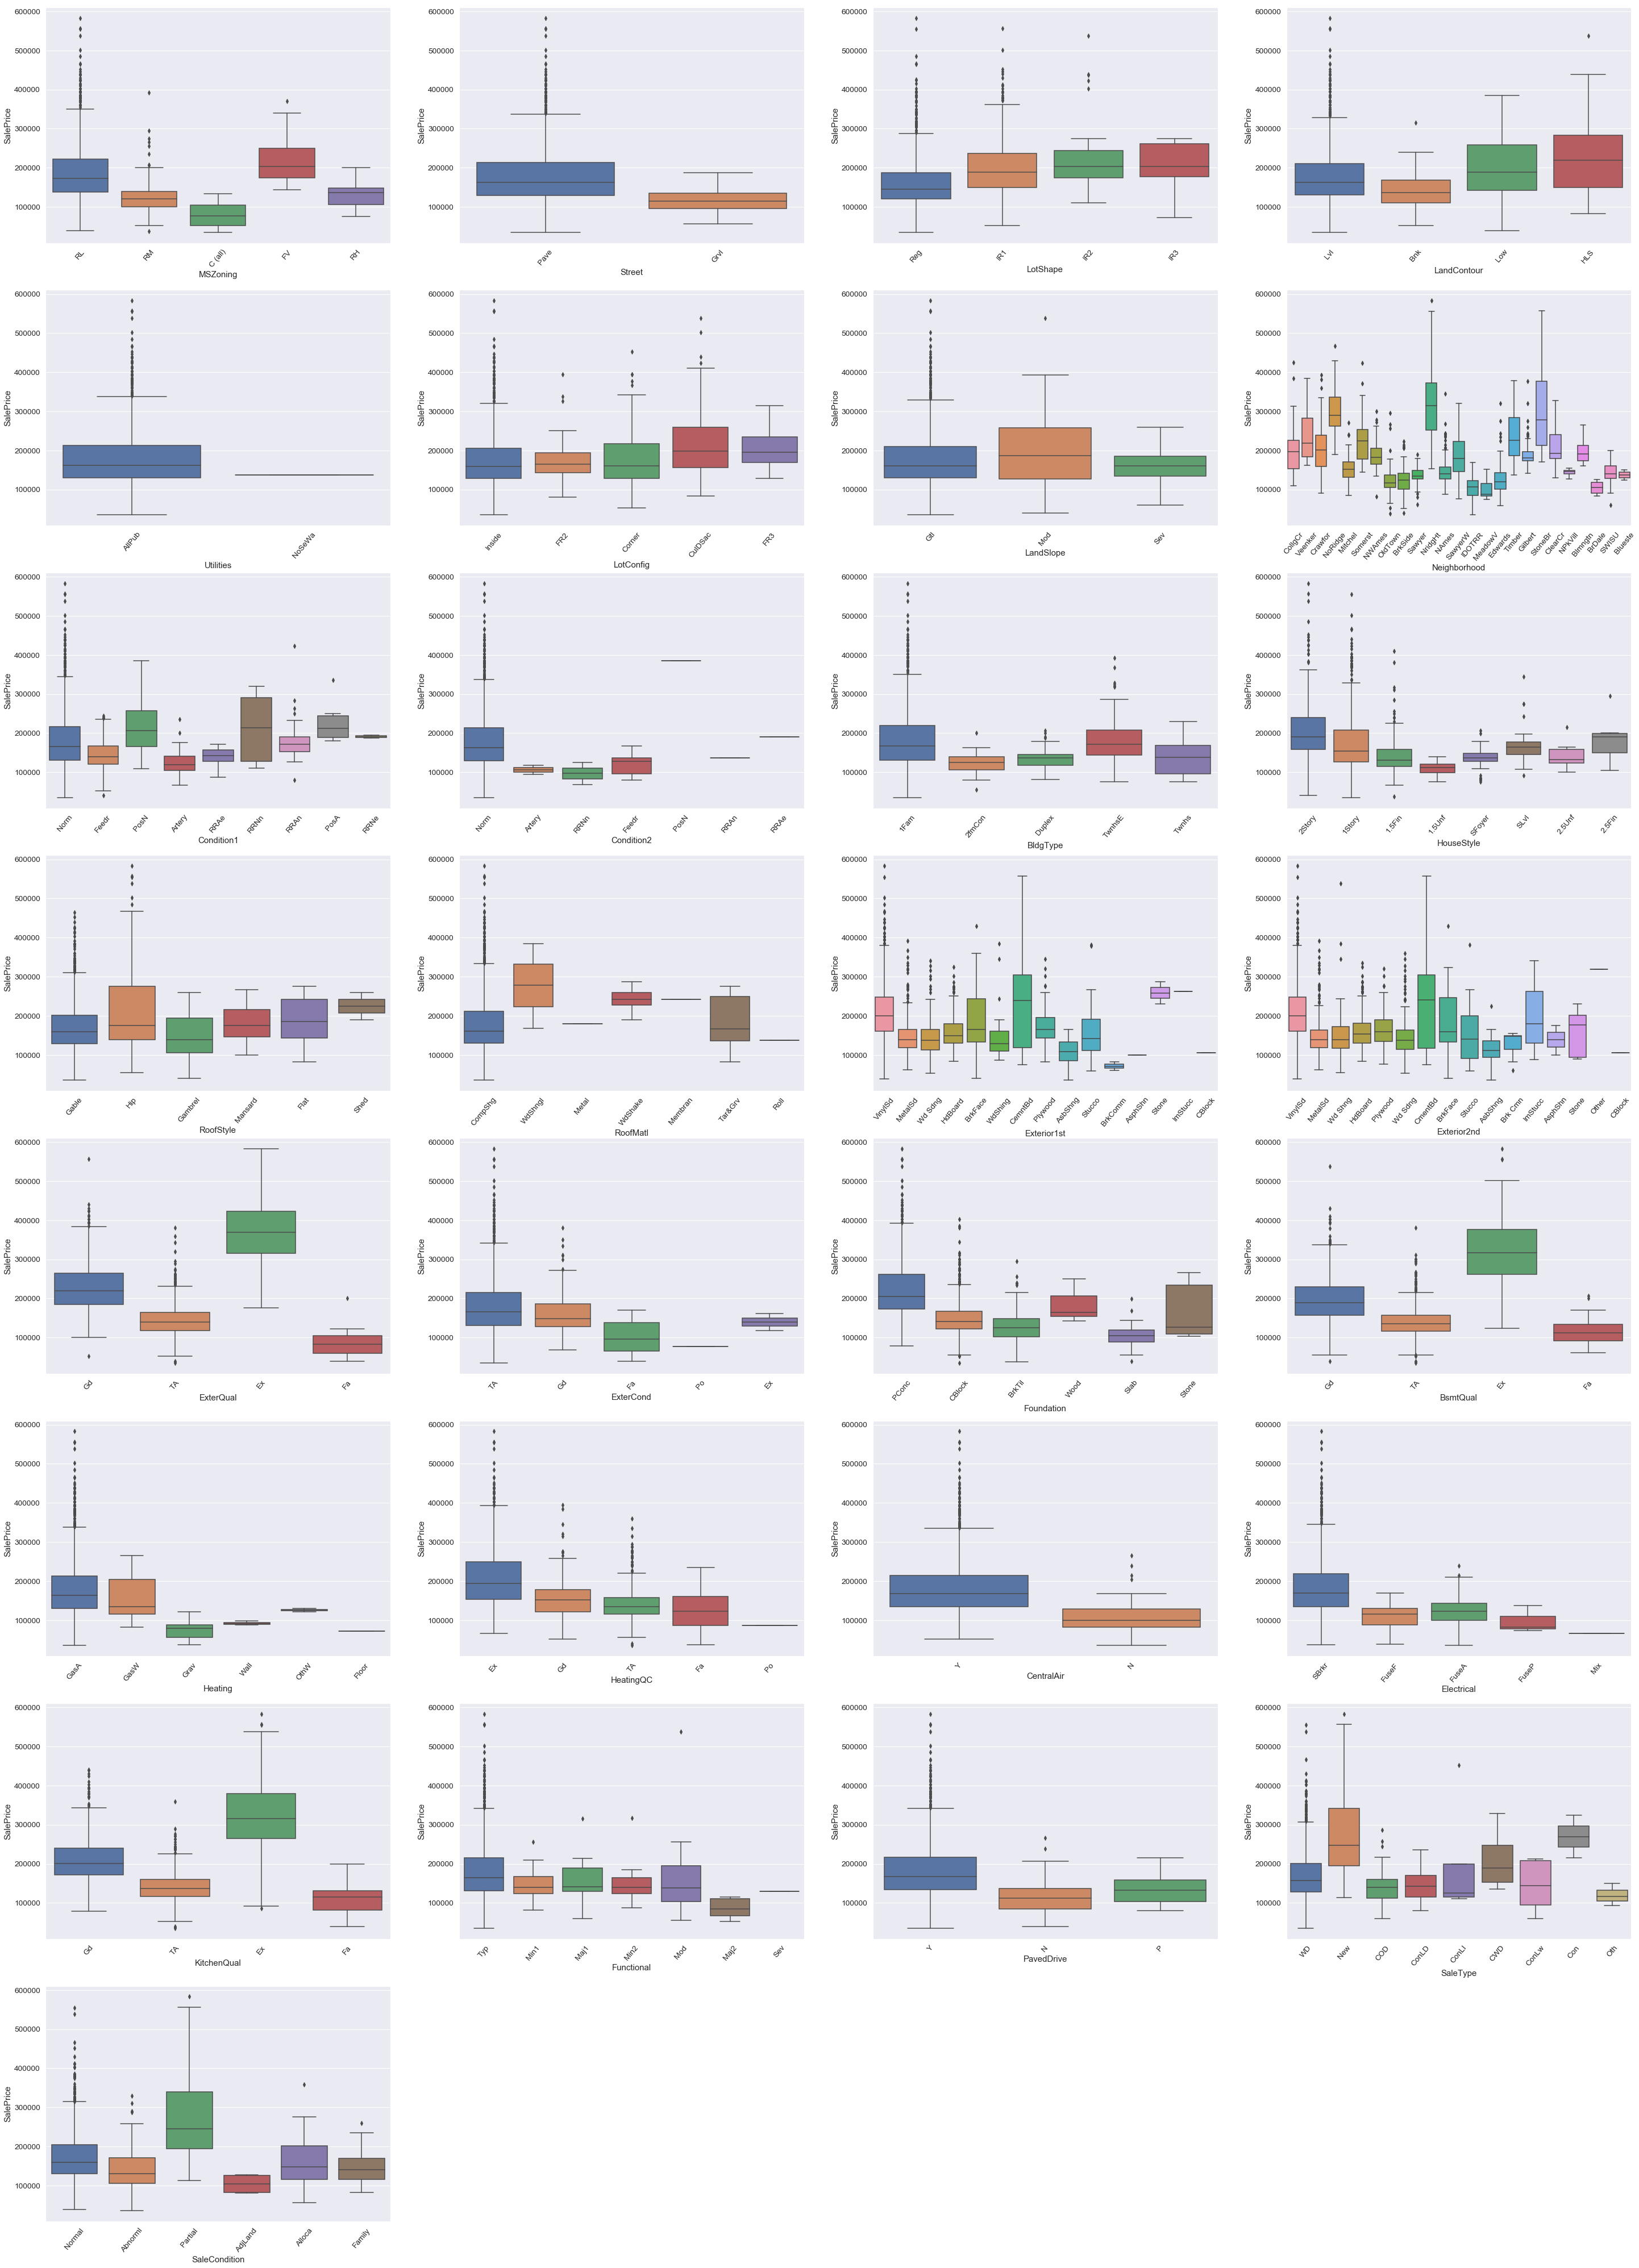

In [22]:
cate_col = list(train_data.columns)
for i in cols_first:
    if(i in cate_col):  # I use to debug
        cate_col.remove(i)
index = 1
fig = plt.figure(figsize=[50, 90])
for i in cate_col:
    x = train_data[i]
    y = train_data['SalePrice']
    plt.subplot(10, 4, index)
    ax = sns.boxplot(x, y)  # categorical plot
    # rotate the x label for good looking
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
    index += 1

choose some variables satisfies above condition

In [23]:
# I choose variables which have more than two kinds of variable.
cate_col = ['CentralAir', 'BsmtQual', 'KitchenQual', 'Neighborhood',
            'RoofStyle', 'Functional', 'SaleCondition', 'SaleType', 'ExterCond']

According to the plot above, we can infer that all of those categorical variables have some correlation with the sale price. We can keep them in our data set.

In [24]:
for i in cate_col:
    cols_first.append(i)
train_data = train_data[cols_first]
cols_first.remove('SalePrice')
test_data = test_data[cols_first]

<font face="Times New Roman" color=red size=4><b>One-hot encoding</b></font>

Some data in the dataframe is str,which is not suitable to do regression. Therefore, we could use <b>one-hot encoding</b> to deal with it.

In [25]:
train_data = pd.get_dummies(train_data).astype(float)
test_data = pd.get_dummies(test_data).astype(float)

#### (Original) Since we change the discrete variables to dummy variables, sometimes  columns in train data do not appear in test data.

In this case,we need to add those missing columns and assign the value 0

In [26]:
list1 = list(train_data.columns)
list2 = list(test_data.columns)
c = [l for l in list1 if l not in list2]  # find the missing column
c.remove('SalePrice')  # sale price is not allowed to appear in test data
for c in c:
    test_data[c] = 0.0

Now,we could have a glipse on our data set again

In [27]:
train_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
test_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
Id,,,,,,,,,,,,,,,,,,,,,
1461,20.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1462,20.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1463,60.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1464,60.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1465,120.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# train_data.to_csv('t.csv')

In [30]:
# test_data.to_csv('t2.csv')

<font face="Times New Roman" color=red size=4><b>Box-Cox Transformation</b></font>

#### Before we take further step,have a look on the distribution of sale price

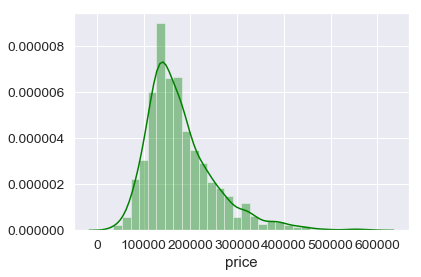

The skewness is 1.442601937080809


In [31]:
y = train_data['SalePrice']
sns.set_palette("hls")
# plot the distribution and the line
sns.distplot(y, color="green", bins=30, kde=True)
plt.xlabel('price')
plt.show()
print("The skewness is "+str(y.skew()))

Obviously, the distribution of sale price is right-skewed
#### In our regression analysis course,  linear regression model makes sense if and only if the random error  follows N (0,σ²）.  However, it will cause low efficiency if we test this assumption after buding the model. So we can prevent it happens in advance.

We could use <b>Box-Cox Transformation</b> to make the distribution of sale price more smooth. 

I learn some code about how to use this transformation from (http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/)

In [32]:
# the function return three values, however, we only need the second one
useless1, max_log, useless2 = stats.boxcox(y, alpha=0.01)
# alpha means the (1-α)% confidence interval
print("The best lambda is = {:g}".format(max_log))

The best lambda is = -0.0456494


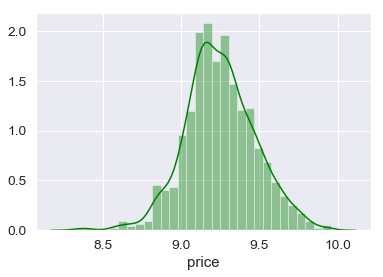

The skewness is -0.0033451111654517196


In [33]:
# box-cox transformation with best parameter
train_data['SalePrice'] = special.boxcox1p(train_data['SalePrice'], max_log)
y_train = train_data['SalePrice']
sns.set_palette("hls")
# plot the distribution and the line
sns.distplot(y_train, color="green", bins=30, kde=True)
plt.xlabel('price')
plt.show()
print("The skewness is "+str(train_data['SalePrice'].skew()))

#### what we should pay attention on is we must take exponent to the data that we predict (inverse Box-Cox Transformation).

## Data Modeling and Validation

<font face="Times New Roman" color=red size=4><b>Model building and model validation</b></font>

#### since we have lots of  variables, simple linear regression probably have terrible performance

Here I use polynomial regression,ridge regression ,lasso regression and GradientBoostingRegression

In [34]:
# create some function to build different model
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


def poly(X, Y):
    degree = np.arange(0, 4)  # My computer has poor memory
    train_score, val_score = validation_curve(
        PolynomialRegression(), X, Y, 'polynomialfeatures__degree', degree, cv=5)
    plt.plot(degree, np.median(train_score, 1),
             color='blue', label='training score')
    plt.plot(degree, np.median(val_score, 1),
             color='red', label='validation score')
    plt.legend(loc='best')
    plt.ylim(0, 1)
    plt.xlabel('degree')
    plt.ylabel('score')


def ridge(X, Y):
    ridge = Ridge(max_iter=1000, tol=0.001)
    # fit_intercept means we assume it do not cross the original point,tol is precision,solver is a method
    parameters = {'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 'normalize': [True, False],
                  'fit_intercept': [True, False],
                  'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [None, 0, 1, 2]}
    # select a series of alpha to input in the model and find which is the best parameter
    model = GridSearchCV(ridge, parameters, n_jobs=-1,
                         scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    # find the best alpha,n_jobs=-1 means we use all the processor,scoring means the criteria is nmse
#     scores = cross_val_score(model, X, Y, cv=5) be caution! it takes lots of time
    model.fit(X, Y)
#     print(pd.DataFrame(model.cv_results_)) too messy,useless
    print("best parameters:")
    print(model.best_params_)
    print("best score:")
    print(model.best_score_)
#     return model.best_score_
#     print('scores:'+str(scores))


def lasso(X, Y):
    lasso = Lasso(max_iter=1000, tol=0.001)
    parameters = {'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 'normalize': [True, False],
                  'fit_intercept': [True, False],
                  'precompute': [True, False], 'warm_start': [True, False],
                  'selection': ['random', 'cyclic'], 'random_state': [None, 0, 1, 2]}
    # select a series of alpha to input in the model and find which is the best parameter
    model = GridSearchCV(lasso, parameters, n_jobs=-1,
                         scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    # find the best alpha,n_jobs=-1 means we use all the processor,scoring means the criteria is nmse
#     scores = cross_val_score(model, X, Y, cv=5) be caution! it takes lots of time
    model.fit(X, Y)
#     print(pd.DataFrame(model.cv_results_)) too messy,useless
    print("best parameters:")
    print(model.best_params_)
    print("best score:")
    print(model.best_score_)
#     return model.best_score_
#     print('scores:'+str(scores))


def GBR(X, Y):
    gbr = GradientBoostingRegressor(tol=0.001, n_estimators=1000)
    parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
                  'learning_rate': [0.1, 0.01, 1], 'warm_start': [True, False],
                  'random_state': [None, 0, 1, 2]}
    # select the best parameter
    model = GridSearchCV(gbr, parameters, n_jobs=-1,
                         scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    # find the best alpha,n_jobs=-1 means we use all the processor,scoring means the criteria is nmse
#     scores = cross_val_score(model, X, Y, cv=5) be caution! it takes lots of time
    model.fit(X, Y)
#     print(pd.DataFrame(model.cv_results_)) too messy,useless
    print("best parameters:")
    print(model.best_params_)
    print("best score:")
    print(model.best_score_)
#     return model.best_score_
#     print('scores:'+str(scores))

Define the X and Y

In [35]:
X = train_data.loc[:, train_data.columns != 'SalePrice']
Y = train_data['SalePrice']

We could test the polynomial regression first

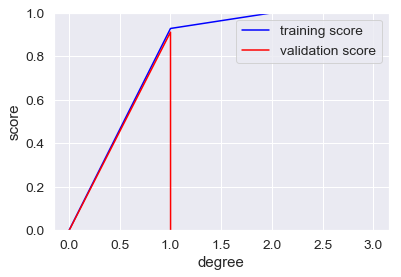

In [36]:
poly(X, Y)

It seems that <b>degree=1</b> is the only choice!

In [37]:
modelp = PolynomialRegression(
    1, fit_intercept=True, normalize=False, n_jobs=-1)
modelp.fit(X, Y)
scorep = np.mean(cross_val_score(modelp, X, Y, cv=5,
                                 scoring='neg_mean_squared_error'))  # get the mean score
predict = modelp.predict(test_data)
p = copy.deepcopy(test_data)
# take exponent to multiple the data
p['predicted'] = inv_boxcox(predict, max_log)

In [38]:
cross_val_score?

Then we test the ridge regression model and lasso regression model

In [39]:
print("ridge:")
ridge(X, Y)
print("lasso:")
lasso(X, Y)
print("Gradient Boosting Regressor:")
GBR(X, Y)

ridge:
best parameters:
{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 1, 'solver': 'sag'}
best score:
-0.004620445828507495
lasso:
best parameters:
{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'precompute': False, 'random_state': None, 'selection': 'random', 'warm_start': False}
best score:
-0.004483081312792229
Gradient Boosting Regressor:
best parameters:
{'learning_rate': 0.1, 'loss': 'lad', 'random_state': None, 'warm_start': True}
best score:
-0.004780227992252201


Use both model to make a prediction on test data set

In [40]:
modelr = Ridge(alpha=1e-2, fit_intercept=True, normalize=True, max_iter=10000,
               tol=0.0001, solver='saga', random_state=1)  # build the model with best parameter
modelr.fit(X, Y)
scorer = np.mean(cross_val_score(modelr, X, Y, cv=5,
                                 scoring='neg_mean_squared_error'))
predict = modelr.predict(test_data)
r = copy.deepcopy(test_data)
# inverse the box-cox transformation before
r['predicted'] = inv_boxcox(predict, max_log)

In [41]:
modell = Lasso(alpha=1e-4, fit_intercept=True, normalize=False, max_iter=10000,
               tol=0.0001, precompute=True, random_state=0, selection='random', warm_start=True)
modell.fit(X, Y)
scorel = np.mean(cross_val_score(modell, X, Y, cv=5,
                                 scoring='neg_mean_squared_error'))
predict = modell.predict(test_data)
l = copy.deepcopy(test_data)
# inverse the box-cox transformation before
l['predicted'] = inv_boxcox(predict, max_log)

In [42]:
modelg = GradientBoostingRegressor(
    tol=0.001, n_estimators=1000, learning_rate=0.1, loss='lad', random_state=0, warm_start=True)
modelg.fit(X, Y)
scoreg = np.mean(cross_val_score(modelg, X, Y, cv=5,
                                 scoring='neg_mean_squared_error'))
predict = modelg.predict(test_data)
g = copy.deepcopy(test_data)
# inverse the box-cox transformation before
g['predicted'] = inv_boxcox(predict, max_log)

<font face="Times New Roman" color=red size=4><b>Visualize the prediction</b></font>

plot the predictied data based on the test data set

the skewness of Polynomial regression is :6.985271378458737
the skewness is of Ridge regression :6.639363181874762
the skewness is of Lasso regression:7.526580658121961
the skewness is of GBR regression:1.5906197286711772


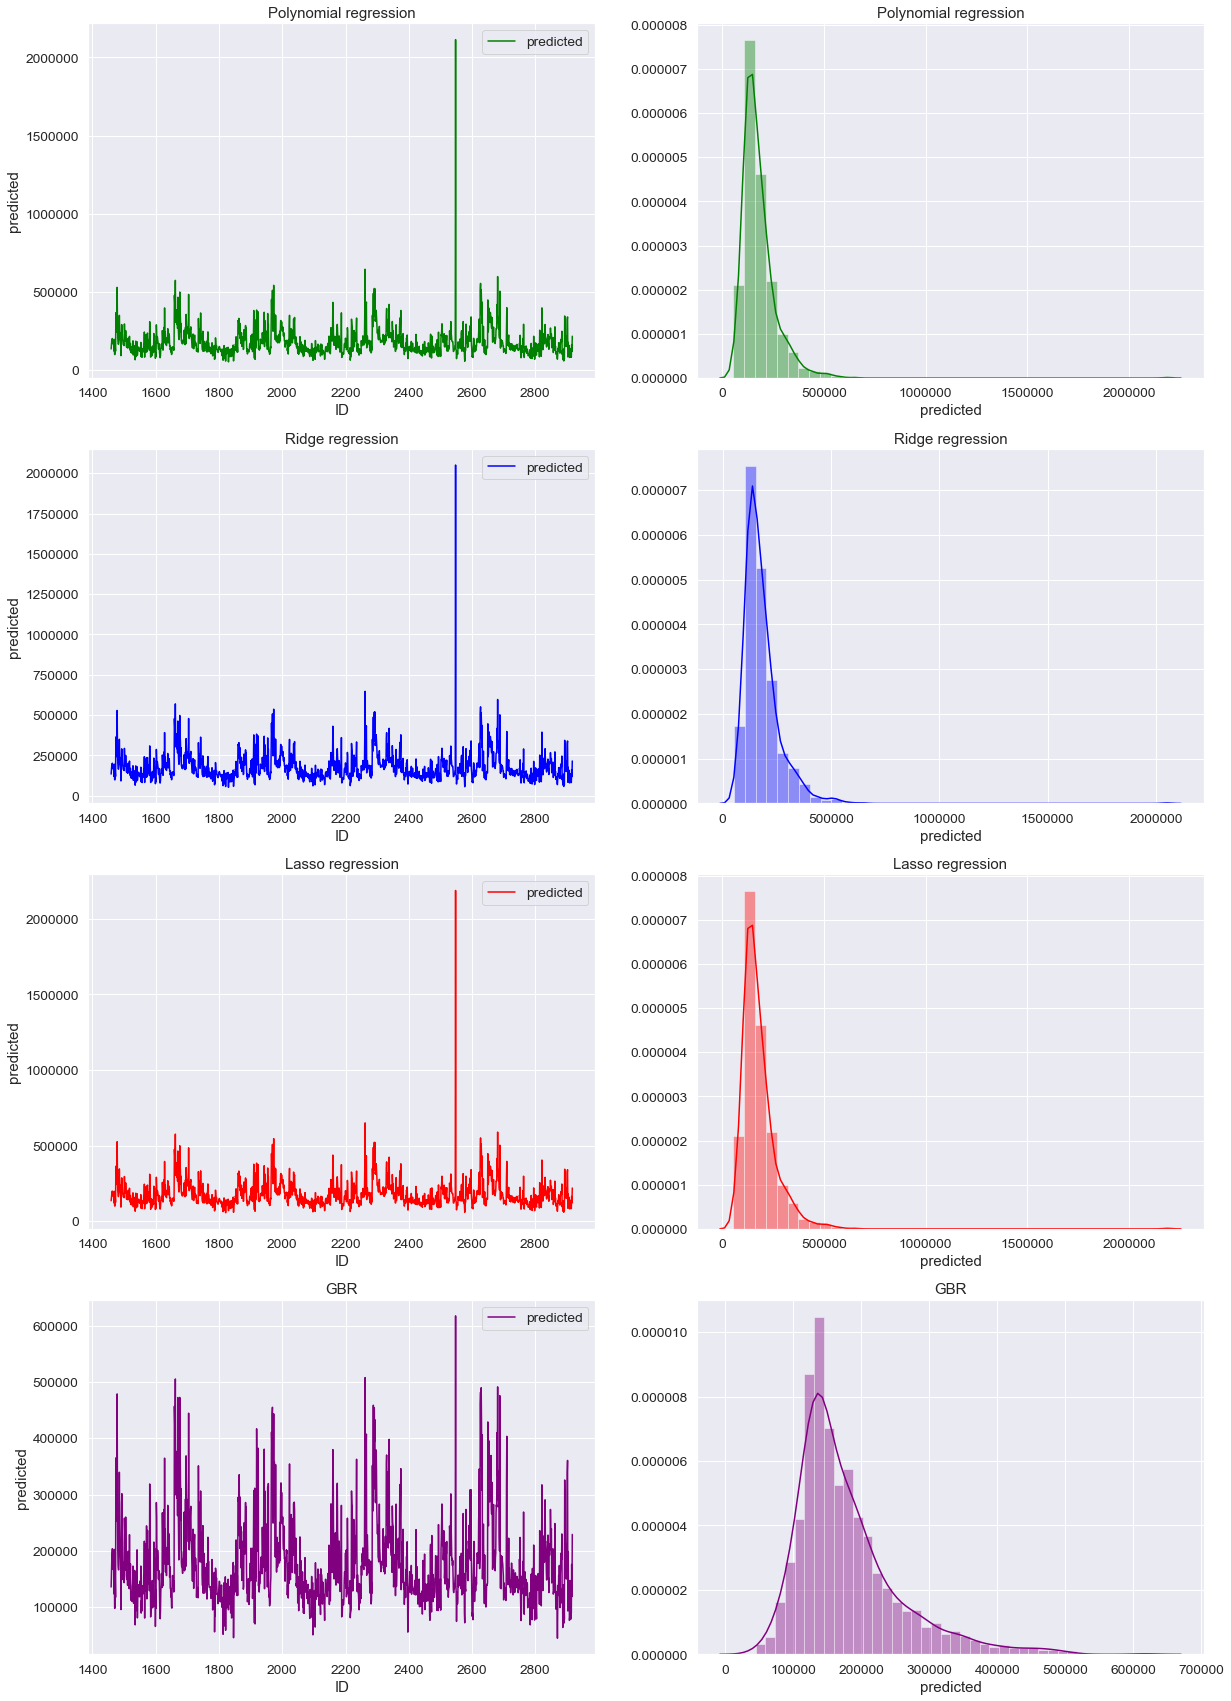

In [43]:
x = np.linspace(1459, 2917, 1459)  # similuate the test id
fig = plt.figure(figsize=[20, 30])
plt.subplot(4, 2, 1)
plt.plot(x, p['predicted'], color='green')
plt.xlabel('ID')
plt.ylabel('predicted')
plt.legend()
plt.title('Polynomial regression')
plt.subplot(4, 2, 2)
sns.distplot(l['predicted'], color="green", bins=40, kde=True)
plt.title('Polynomial regression')
print("the skewness of Polynomial regression is :"+str(p['predicted'].skew()))

plt.subplot(4, 2, 3)
plt.plot(x, r['predicted'], color='blue')
plt.xlabel('ID')
plt.ylabel('predicted')
plt.legend()
plt.title('Ridge regression')
plt.subplot(4, 2, 4)
sns.distplot(r['predicted'], color="blue", bins=40, kde=True)
plt.title('Ridge regression')
print("the skewness is of Ridge regression :"+str(r['predicted'].skew()))

plt.subplot(4, 2, 5)
plt.plot(x, l['predicted'], color='red')
plt.xlabel('ID')
plt.ylabel('predicted')
plt.legend()
plt.title('Lasso regression')
plt.subplot(4, 2, 6)
sns.distplot(l['predicted'], color="red", bins=40, kde=True)
plt.title('Lasso regression')
print("the skewness is of Lasso regression:"+str(l['predicted'].skew()))

plt.subplot(4, 2, 7)
plt.plot(x, g['predicted'], color='purple')
plt.xlabel('ID')
plt.ylabel('predicted')
plt.legend()
plt.title('GBR')
plt.subplot(4, 2, 8)
sns.distplot(g['predicted'], color="purple", bins=40, kde=True)
plt.title('GBR')
print("the skewness is of GBR regression:"+str(g['predicted'].skew()))

<font face="Times New Roman" color=red size=4><b>Compare the score (fitting)</b></font>

Compare the score basis on the priciple 'neg mean squared error'

([<matplotlib.axis.YTick at 0x284b5988588>,
 <a list of 10 Text yticklabel objects>)

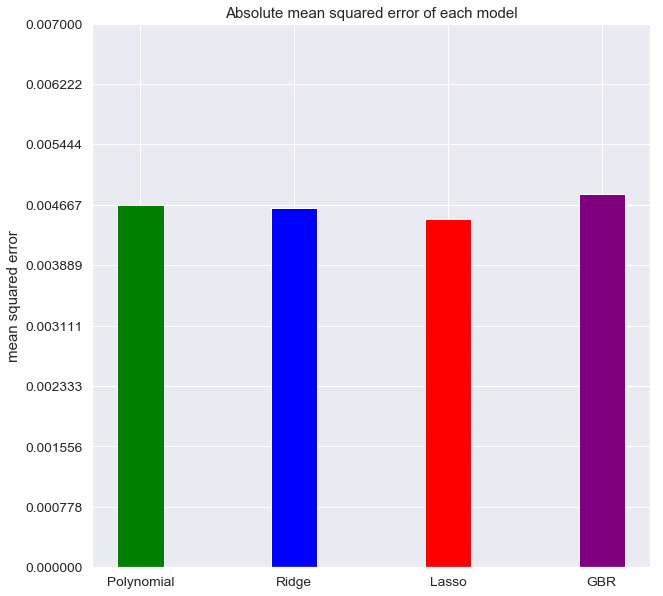

In [44]:
x = ['Polynomial', 'Ridge', 'Lasso', 'GBR']
y = [abs(scorep), abs(scorer), abs(scorel), abs(scoreg)]
fig = plt.figure(figsize=[10, 10])
plt.bar(x, y, width=0.3, color=['green', 'blue', 'red', 'purple'])
plt.ylabel('mean squared error')
plt.title('Absolute mean squared error of each model')
plt.yticks(np.linspace(0, 0.007, 10))

<font face="Times New Roman" color=red size=4><b>Submit to Kaggle</b></font>

From the plot above, it seems that <b>lasso model</b> has better performance than others(not too much),we can choose lasso model as our final model

Finally, We can export our data to csv file and submit online!

In [45]:
result = pd.DataFrame()
result['SalePrice'] = l['predicted']  # using lasso model
result.index = test_data.index
result.to_csv('submission.csv')

<font face="Times New Roman" color=red size=4><b>Grade --- Top 29%</b></font>

My performance is OK

![jupyter](./4.JPG)

![jupyter](./5.JPG)

<font face="Times New Roman" color=red size=4><b>Possible improvement</b></font>

It's quite difficult to use linear model to fit a data set which contains over one hundreds dimensions. Using neural network model probably is a good try

For example, <b>Orange</b> is a useful and user-friedly tool to build a naive neural network by yourself. It provides a GUI to building a model,do a cross validation and predict the data.

![jupyter](./1.JPG)

Setting some unknown parameters randomly

![jupyter](./2.JPG)

<font face="Times New Roman" color=red size=4><b>Reference</b></font>

1.[我的Kaggle初探--House Price Predict](https://blog.csdn.net/iam_emily/article/details/79307373)

2.[Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project](http://jse.amstat.org/v19n3/decock.pdf)

3.[House prices: Lasso, XGBoost, and a detailed EDA](https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda)

4.[Regression Analysis](https://ispace.uic.edu.hk/)